## **Marketing Campaign For Banking Products**

**Dataset Information:**

Name: Bank_Personal_Loan_Modelling.xlsx

Domain: Banking

Aim: To classify in order to predict the likelihood of a liability bank customer for buying personal loan.

**Learning Outcomes:**

Exploratory Data Analysis

Preparing the data to train a model

Training and making predictions using a classification model

Model evaluation

**Goal:**


*   To sell more Personal Loan products to Bank customers.
*   To devise campaigns to better target marketing to increase the success ratio with a minimal budget.

*   To identify the potential customers who have a higher probability of purchasing a loan.


**About the dataset, column attributes (independent variables) and target variable (dependent variable)**

The dataset is related to the Banking sector where a bank (namely Thera bank) having information of about 5000 liability customers wants to benefit from the information to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). The data includes customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan) which saw a healthy conversion rate of 9.6% i.e., 480 out of 5000 liablility customers opted for personal loans.

Now, the retail department of the bank wants to build a machine learning model in order devise campaigns with better target marketing to increase the success ratio with minimal budget. The model should help them identify the potential customers who have a higher probability of purchasing the loan which will eventually increase their success ratio at the reduced campaign cost.

**There are total 14 attributes in the dataset and in the context of the given problem, the target (or dependent) attribute is "Personal Loan" whereas the remaining are independent attributes.**


**Attribute Information: **

ID : Customer ID

Age : Customer's age in completed years

Experience : #years of professional experience

Income : Annual income of the customer ($000)

ZIP Code : Home Address ZIP code.

Family : Family size of the customer

CCAvg : Avg. spending on credit cards per month ($000)

Education : Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional

Mortgage : Value of house mortgage if any. ($000)


Securities Account : Does the customer have a securities account with the bank?

CD Account : Does the customer have a certificate of deposit (CD) account with the bank?

Online : Does the customer use internet banking facilities?

Credit card : Does the customer use a credit card issued by UniversalBank?

Personal Loan : Did this customer accept the personal loan offered in the last campaign? (Target Attribute)

## **Loading Packages**

In [1]:
# Importing the necessary libraries
import numpy as np #importing numpy library
import pandas as pd  # To read the dataset as dataframe
import seaborn as sns # For Data Visualization
sns.set(style="ticks")
import pylab as pl
from scipy.stats import zscore
import matplotlib.pyplot as plt # Necessary module for plotting purpose
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
plt.rcParams["figure.figsize"]=(14,8)

## **Loading the Data**

In [2]:
df_orig=pd.read_excel('Bank_Personal_Loan_Modelling.xlsx','Data')


In [3]:
#To display the top 10 rows
df_orig.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [4]:
#To display the bottom 10 rows
df_orig.tail(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4990,4991,55,25,58,95023,4,2.000000,3,219,0,0,0,0,1
4991,4992,51,25,92,91330,1,1.900000,2,100,0,0,0,0,1
4992,4993,30,5,13,90037,4,0.500000,3,0,0,0,0,0,0
4993,4994,45,21,218,91801,2,6.666667,1,0,0,0,0,1,0
4994,4995,64,40,75,94588,3,2.000000,3,0,0,0,0,1,0
4995,4996,29,3,40,92697,1,1.900000,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.400000,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.300000,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.500000,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.800000,1,0,0,0,0,1,1


In [5]:
# Creating copy of original dataframe 
df = df_orig.copy()
# Making target attribute "Personal Loan" as the last column 
# of our dataframe.
df.drop('Personal Loan',axis=1,inplace=True)
df['Personal Loan'] = df_orig['Personal Loan']

In [6]:
df.shape

(5000, 14)

There are 5000 rows and 14 columns in this dataset.

# **Checking the types of data and basic summary statistics**

In [7]:
#To display the datatype of each column and the non-null rows for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
Personal Loan         5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


Observations:

*   Numeric data columns (Interval or Ratio) are: Age, Experience, Income, Mortgage and CCAvg.
*   Ordinal Categorical columns are: Family and Education.

*   Nominal Categorical columns are: ID, ZIP Code, Securities Account, CD Account, Online, CreditCard, Personal Loan.












In [8]:
# The column (attribute) names are:
for name in df.columns:
    print(name)

ID
Age
Experience
Income
ZIP Code
Family
CCAvg
Education
Mortgage
Securities Account
CD Account
Online
CreditCard
Personal Loan


In [9]:
# Let us see datatypes of the column attributes
df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
Personal Loan           int64
dtype: object

Observation:

Data type of column 'CCAvg' is float64, whereas remaining attributes are of type int64

In [10]:
# Number of unique datatypes and their value count
df.dtypes.value_counts()

int64      13
float64     1
dtype: int64

In [11]:
# Let us check the dataset for missing values
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
Personal Loan         0
dtype: int64

Observation:

There are no missing values in any of the column attributes.

In [12]:
df.isnull().values.any()

False

In [13]:
# 5-point summary of for the attributes
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.104400,0.06040,0.596800,0.294000,0.096000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.305809,0.23825,0.490589,0.455637,0.294621
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.00000,1.000000,1.000000,0.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.00000,1.000000,1.000000,1.000000


Observations:

*  'Experience' column shows presence of negative entries (min=-3) which is wrong and needs to be handled appropriately.

*   Remaining numeric columns such as Age, Income, CCAvg, Mortgage seem to be fine and no data cleaning is required.

*   The customer ages are in the range of 23 to 67 with average age as 45. Quarter of the customer population is below 35.

*  Columns with binary information such as Securities Account, CD Account, Online, CreditCard, Personal Loan are also clean.

In [14]:
# Number of negative entries in the Experience column
df[df['Experience']<0].Experience.count()

52

In [15]:
df[df['Experience'] < 0].shape

(52, 14)

Observation:

We have 52 rows having negative expeience (which is 1% of the total sample)


In [16]:
# Number of unique negative entries 
df[df['Experience']<0].Experience.value_counts()

-1    33
-2    15
-3     4
Name: Experience, dtype: int64

Observation:

There are there unique negative entries -1,-2 and -3 in the experience column.

In [17]:
#Correlation of Experience Attribute with other attributes
df.corr()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
ID,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,-0.024672,0.021463,-0.013920,-0.016972,-0.006909,-0.002528,0.017028,-0.024801
Age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052030,0.041334,-0.012539,-0.000436,0.008043,0.013702,0.007681,-0.007726
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050089,0.013152,-0.010582,-0.001232,0.010353,0.013898,0.008967,-0.007413
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645993,-0.187524,0.206806,-0.002616,0.169738,0.014206,-0.002385,0.502462
ZIP Code,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004068,-0.017377,0.007383,0.004704,0.019972,0.016990,0.007691,0.000107
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109285,0.064929,-0.020445,0.019994,0.014110,0.010354,0.011588,0.061367
CCAvg,-0.024672,-0.052030,-0.050089,0.645993,-0.004068,-0.109285,1.000000,-0.136138,0.109909,0.015087,0.136537,-0.003620,-0.006686,0.366891
Education,0.021463,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136138,1.000000,-0.033327,-0.010812,0.013934,-0.015004,-0.011014,0.136722
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109909,-0.033327,1.000000,-0.005411,0.089311,-0.005995,-0.007231,0.142095
Securities Account,-0.016972,-0.000436,-0.001232,-0.002616,0.004704,0.019994,0.015087,-0.010812,-0.005411,1.000000,0.317034,0.012627,-0.015028,0.021954


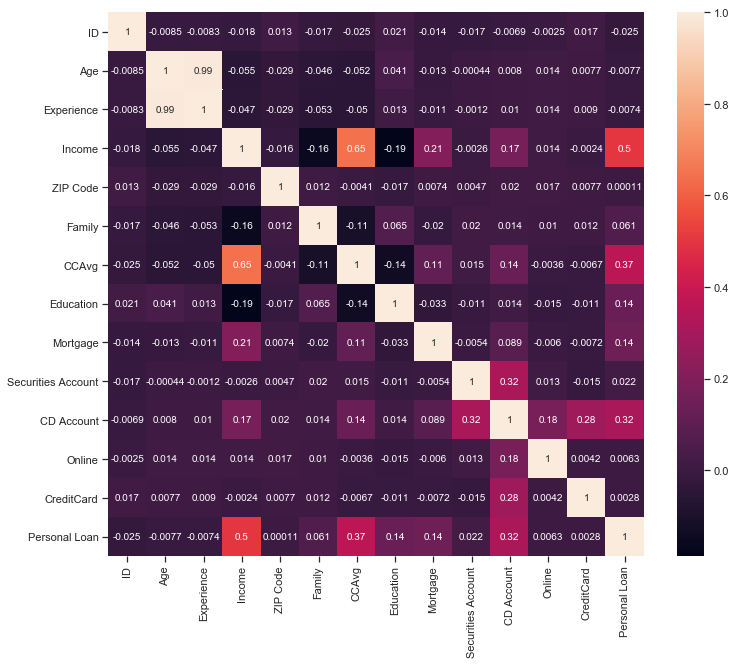

In [18]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True)

Observation:

 Experience attribute is highly correlated with the Age attribute so we will use this for our data cleaning purpose

# **Cleaning the Data**

In [19]:
#Updating the negative values of Experience attribute to median
df['Experience'].mask(df['Experience'] < 0, df.Experience.median(), inplace=True)

Observation:

We have few negative values in experience which we updated to median.

In [20]:
df.Experience.describe()

count    5000.000000
mean       20.327600
std        11.253035
min         0.000000
25%        11.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64

## **Exploratory Data Analysis**

In [21]:
#number of unique in each column
df.nunique()

ID                    5000
Age                     45
Experience              44
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
Personal Loan            2
dtype: int64

In [22]:
# top 10 locations who appled personal loan before

zipcode_top10 = df[df["Personal Loan"]==1]['ZIP Code'].value_counts().head(10)
zipcode_top10

94720    19
94305    13
92093     9
90095     8
90089     8
94304     8
92182     7
94022     6
95051     6
95616     6
Name: ZIP Code, dtype: int64

Observation:

Zip code has 467 distinct values.It is a nominal variable which has too many levels.

In [23]:
# Number of People with 0 mortgage
(df.Mortgage==0).sum()

3462

There are 3462 people with 0 mortgage out of 5000(making it skewed)

In [24]:
# Number of people with 0 credit card spending per month
(df.CCAvg==0).sum()

106

There are 106 people with 0 average credit card spending per month

## Value counts for all categorical columns

In [25]:
df.Family.value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

In [26]:
df.Education.value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [27]:
df['Securities Account'].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

In [28]:
df['CD Account'].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

In [29]:
df['CreditCard'].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

In [30]:
df.Online.value_counts()

1    2984
0    2016
Name: Online, dtype: int64

In [31]:
# Let us see the distribution 5000 entries in target column
df['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

480 customers out of 5000 had opted for personal loan in the previous campaign



The column attribute "ID" and "Zip Code" doesn't provide any significant information about a customer buying a personal loan hence we will skip analysis of the same.




# **Univariate & Bivariate Analysis**

## Analysis of Age attribute

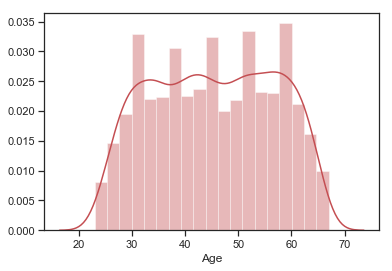

In [32]:
## Univariate Analysis
sns.distplot( df['Age'], color = 'r')

Age seems to have symmetric distribution.Most of the customers age fall in the age range of 30 to 60 yrs.

Text(0.5, 1.0, 'Age Distribution')

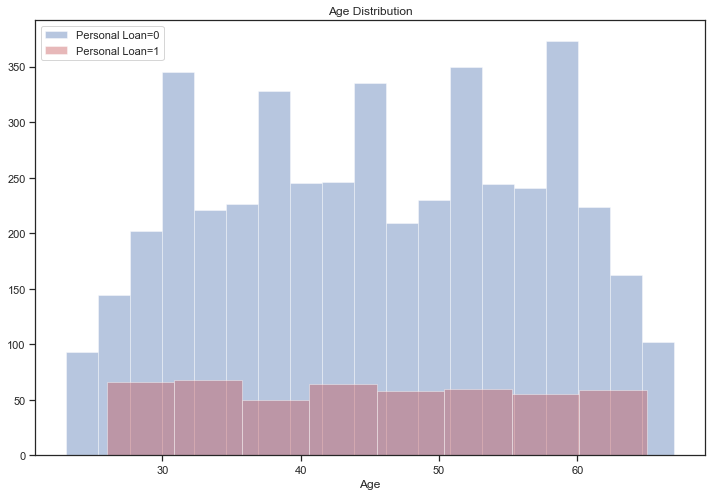

In [33]:
plt.figure(figsize=(12,8))
sns.distplot(df[df['Personal Loan'] == 0]['Age'],kde=False, color='b', label='Personal Loan=0')
sns.distplot(df[df['Personal Loan'] == 1]['Age'],kde=False, color='r',label='Personal Loan=1')
plt.legend()
plt.title("Age Distribution")

In [34]:
age_cut = pd.cut(df['Age'],bins=[20,30,40,50,60])
pd.crosstab(age_cut,df['Personal Loan']).apply(lambda r: r/r.sum()*100, axis=1)

Personal Loan,0,1
Age,,
"(20, 30]",89.423077,10.576923
"(30, 40]",90.453074,9.546926
"(40, 50]",90.393701,9.606299
"(50, 60]",91.307634,8.692366


Observations: 

*   Most of the customers lie in the age group of 30 to 60.
*   10.5% of the total customers in age group 20-30 have bought personal loan from the bank, while in age groups (30-40), (40-50) and (50-60), there is a conversion rate of around 9%.

## Analysis of Experience attribute

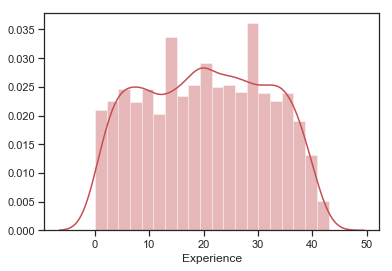

In [35]:
#Univariate Analysis
sns.distplot( df['Experience'], color = 'r')

Text(0.5, 1.0, 'Experience Distribution')

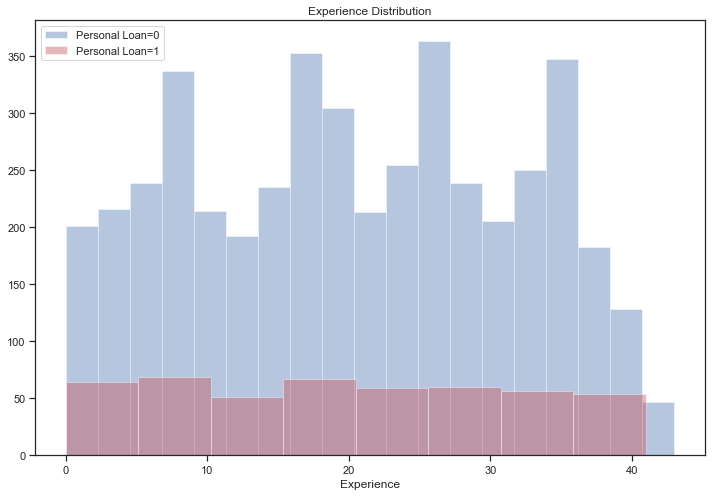

In [36]:
plt.figure(figsize=(12,8))
sns.distplot(df[df['Personal Loan'] == 0]['Experience'],kde=False, color='b', label='Personal Loan=0')
sns.distplot(df[df['Personal Loan'] == 1]['Experience'],kde=False, color='r',label='Personal Loan=1')
plt.legend()
plt.title("Experience Distribution")

In [37]:
exp_cut = pd.cut(df['Experience'],bins=[0,10,20,30,40,50])
pd.crosstab(exp_cut,df['Personal Loan']).apply(lambda r: r/r.sum()*100, axis=1)

Personal Loan,0,1
Experience,,
"(0, 10]",89.239966,10.760034
"(10, 20]",90.957854,9.042146
"(20, 30]",90.853190,9.146810
"(30, 40]",90.661831,9.338169
"(40, 50]",87.037037,12.962963


Observations:

* Out of the total customers with experience in the range 40-50 show a good conversion rate of almost 13% for buying the personal loan
* There is a healthy conversion rate of about 10.30% in the experience range 0 to 10.


* In the ranges (10-20), (20-30) and (30-40) years of experience it is around 9%





## Analysis of Income Attribute

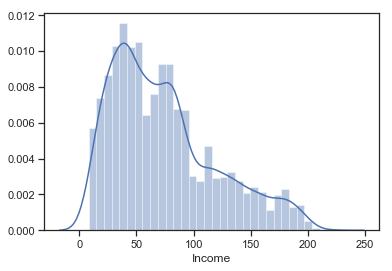

In [38]:
#Univariate Analysis
sns.distplot(df.Income)

Income is right skewed distribution.

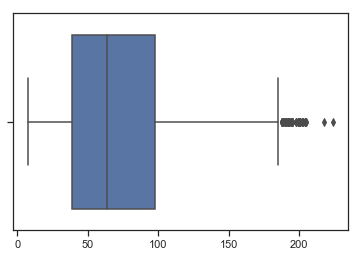

In [39]:
sns.boxplot(df[['Income']])

Most of the customers earn an income between 10K to 100K.

Text(0.5, 1.0, 'Income Distribution')

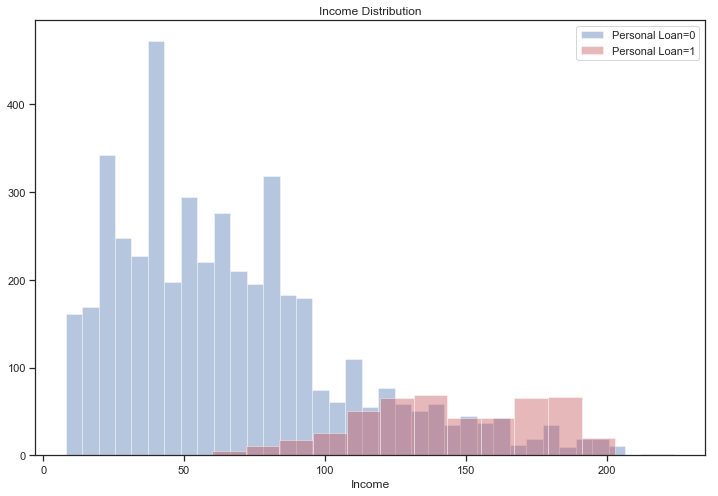

In [40]:
plt.figure(figsize=(12,8))
sns.distplot(df[df['Personal Loan'] == 0]['Income'],kde=False, color='b', label='Personal Loan=0')
sns.distplot(df[df['Personal Loan'] == 1]['Income'],kde=False, color='r',label='Personal Loan=1')
plt.legend()
plt.title("Income Distribution")

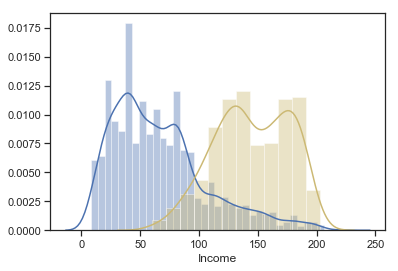

In [41]:
sns.distplot( df[df["Personal Loan"] == 0]['Income'], color = 'b')
sns.distplot( df[df["Personal Loan"] == 1]['Income'], color = 'y')

In [42]:
inc_cut = pd.cut(df['Income'],bins=[0,50,100,150,200,250])
pd.crosstab(inc_cut,df['Personal Loan']).apply(lambda r: r/r.sum()*100, axis=1)

Personal Loan,0,1
Income,,
"(0, 50]",100.000000,0.000000
"(50, 100]",97.758805,2.241195
"(100, 150]",71.428571,28.571429
"(150, 200]",49.530516,50.469484
"(200, 250]",81.250000,18.750000


Observations:


*   No customer with income < 50,000$ opted for the personal loan 

*   Half of the cutomers with income within the range of 150 to 200 thousand dollars purchased personal loan.



*   Customers within range of (100 to 150) and (200 to 250) 
thousand dollars showed a conversion rate of about 28.5% and 18.75%, respectively.




## Analysis of Family Attribute

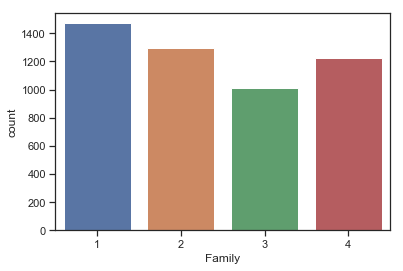

In [43]:
#Univariate Analysis
sns.countplot(df.Family)

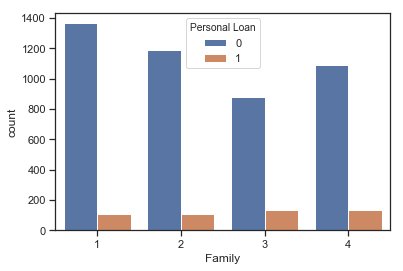

In [44]:
# Since it is a ordinal categorical variable, we will use countplot
sns.countplot(x='Family',hue='Personal Loan',data=df)

In [45]:
pd.crosstab(df['Family'],df['Personal Loan']).apply(lambda r: r/r.sum()*100, axis=1)

Personal Loan,0,1
Family,,
1,92.730978,7.269022
2,91.820988,8.179012
3,86.831683,13.168317
4,89.034370,10.965630


Checking more on if family size have any influence on whether a customer accepts a personal loan offer

In [46]:
familysizewith_no = np.mean( df[df["Personal Loan"] == 0]['Family'] )
familysizewith_no

2.3734513274336284

In [47]:
familysizewith_yes = np.mean( df[df["Personal Loan"] == 1]['Family'] )
familysizewith_yes

2.6125

In [48]:
from scipy import stats
stats.ttest_ind(df[df["Personal Loan"] == 1]['Family'], df[df["Personal Loan"] == 1]['Family'])

Ttest_indResult(statistic=0.0, pvalue=1.0)

Observations:



*  About 13% customers with family size of 3 and 11% customers with family size of 4, purchased personal loans from the bank.
*   There is no impact of Family size on decision to take the loan








## Analysis of CCAvg Attribute

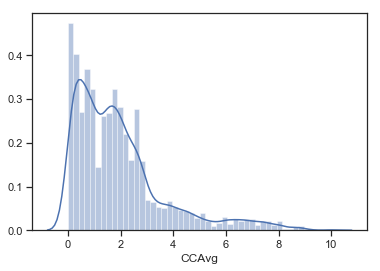

In [49]:
#Univariate Analysis
sns.distplot(df.CCAvg)

Credit Card Average is right skewed distribution.

Text(0.5, 1.0, 'CCAvg Distribution')

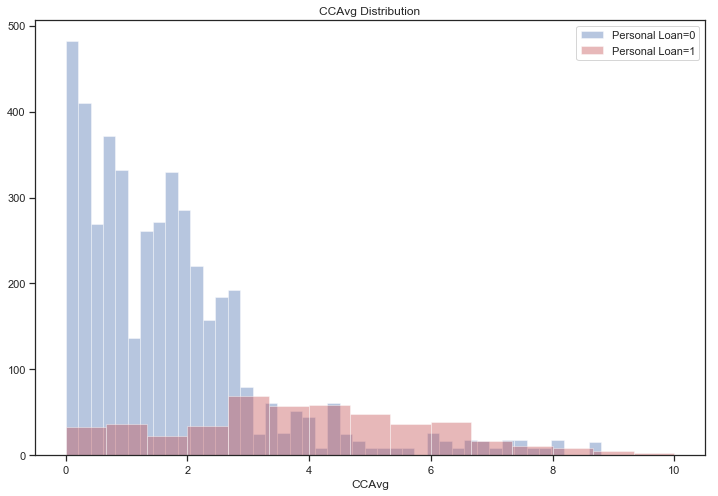

In [50]:
plt.figure(figsize=(12,8))
sns.distplot(df[df['Personal Loan'] == 0]['CCAvg'],kde=False, color='b', label='Personal Loan=0')
sns.distplot(df[df['Personal Loan'] == 1]['CCAvg'],kde=False, color='r',label='Personal Loan=1')
plt.legend()
plt.title("CCAvg Distribution")

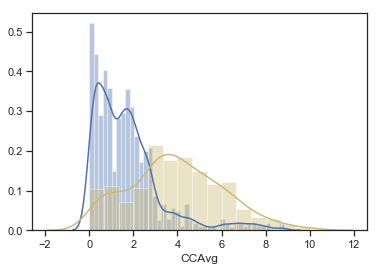

In [51]:
sns.distplot( df[df["Personal Loan"] == 0]['CCAvg'], color = 'b')
sns.distplot( df[df["Personal Loan"] == 1]['CCAvg'], color = 'y')

In [52]:
ccavg_cut = pd.cut(df['CCAvg'],bins=[0,2,4,6,8,10])
pd.crosstab(ccavg_cut,df['Personal Loan']).apply(lambda r: r/r.sum()*100, axis=1)

Personal Loan,0,1
CCAvg,,
"(0, 2]",96.975486,3.024514
"(2, 4]",86.450540,13.549460
"(4, 6]",53.074434,46.925566
"(6, 8]",69.306931,30.693069
"(8, 10]",64.102564,35.897436


Observations:

*   CCAvg shows good correlation with target attribute.
*   Customers with more average spending on credit cards per month also show more tendancy to buy the personal loans. 

*   Customers with avg. credit card spending in the range of 4 to 6 thousand dollars show around 47% conversion rate.

* Customer who didn't take the loan looks like have less credit card score than who have taken the loan.

*   Hence, high credit card average lokks to be good predictor to decide whether or not a customer will take the personal loan.








 




## Analysis of Education Attribute

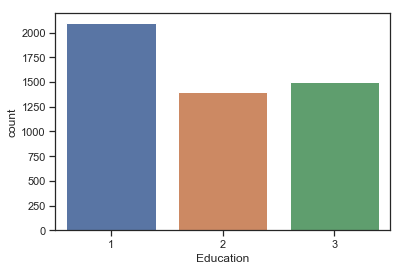

In [53]:
# Univariate Analysis
sns.countplot(df.Education)

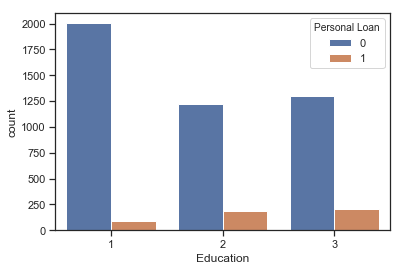

In [54]:
# Since Education is an ordinal categorical variable, we will use countplot
sns.countplot(df['Education'],hue=df['Personal Loan'])

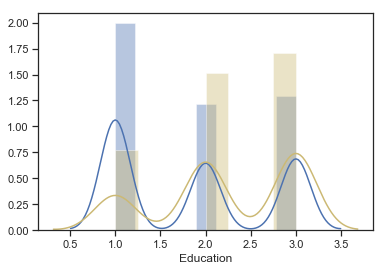

In [55]:
sns.distplot( df[df["Personal Loan"] == 0]['Education'], color = 'b')
sns.distplot( df[df["Personal Loan"] == 1]['Education'], color = 'y')

In [56]:
pd.crosstab(df['Education'],df['Personal Loan']).apply(lambda r: r/r.sum()*100, axis=1)

Personal Loan,0,1
Education,,
1,95.562977,4.437023
2,87.027798,12.972202
3,86.342438,13.657562


Observation:

Customers with "graduate" and "Advanced/Professional" education levels show a good conversion rate of about 13% and 13.65%, respectively.

## Analysis of Mortgage Attribute

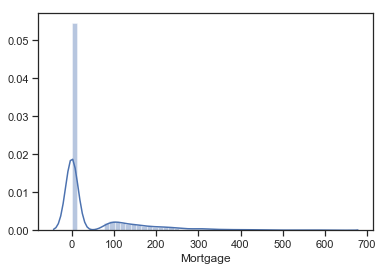

In [57]:
# Univariate Analysis
sns.distplot(df.Mortgage)

Mortgage column seems highly skewed.

Text(0.5, 1.0, 'Mortgage Distribution')

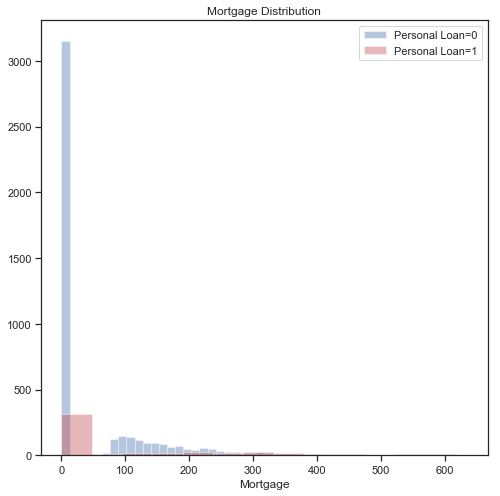

In [58]:
plt.figure(figsize=(8,8))
sns.distplot(df[df['Personal Loan'] == 0]['Mortgage'],kde=False, color='b', label='Personal Loan=0')
sns.distplot(df[df['Personal Loan'] == 1]['Mortgage'],kde=False, color='r',label='Personal Loan=1')
plt.legend()
plt.title("Mortgage Distribution")

In [59]:
mort_cut = pd.cut(df['Mortgage'],bins=[0,100,200,300,400,500,600])
pd.crosstab(mort_cut,df['Personal Loan']).apply(lambda r: r/r.sum()*100, axis=1)

Personal Loan,0,1
Mortgage,,
"(0, 100]",95.390071,4.609929
"(100, 200]",94.854881,5.145119
"(200, 300]",86.531987,13.468013
"(300, 400]",68.750000,31.250000
"(400, 500]",58.333333,41.666667
"(500, 600]",33.333333,66.666667


Observation:

Customers having house Mortgage value in the ranges (300 to 400), (400 to 500) and (500 to 600) show good tendency to buy the personal loans.

# Analyzing the binary variables Securities Account, CD Account, Online and CreditCard

Since they are nominal variables we will use count plot and box plots for analysis

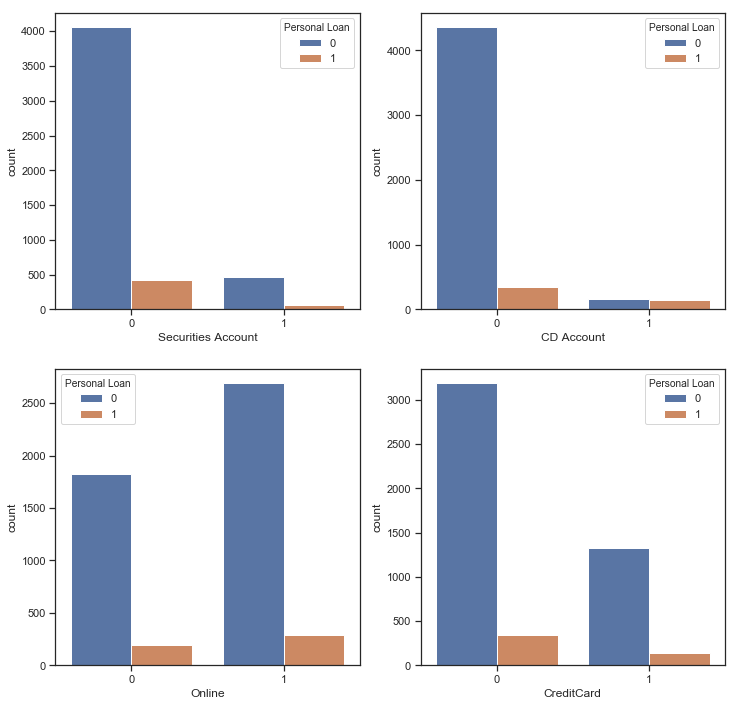

In [60]:
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
sns.countplot(df['Securities Account'],hue=df['Personal Loan'])
plt.subplot(2,2,2)
sns.countplot(df['CD Account'],hue=df['Personal Loan'])
plt.subplot(2,2,3)
sns.countplot(df['Online'],hue=df['Personal Loan'])
plt.subplot(2,2,4)
sns.countplot(df['CreditCard'],hue=df['Personal Loan'])

In [61]:
pd.crosstab(df['Securities Account'],df['Personal Loan']).apply(lambda r: r/r.sum()*100, axis=1)

Personal Loan,0,1
Securities Account,,
0,90.620813,9.379187
1,88.505747,11.494253


Observation:

Customers with Securities account have slightly higher percentage of buying the personal loan than the customers with no Securities account

In [62]:
pd.crosstab(df['CD Account'],df['Personal Loan']).apply(lambda r: r/r.sum()*100, axis=1)

Personal Loan,0,1
CD Account,,
0,92.762878,7.237122
1,53.642384,46.357616


Observation:

Customers with CD account have very high percentage (46.3%) of buying the personal loan than the customers with no CD account (7.2%)

In [63]:
pd.crosstab(df['Online'],df['Personal Loan']).apply(lambda r: r/r.sum()*100, axis=1)

Personal Loan,0,1
Online,,
0,90.625000,9.375000
1,90.247989,9.752011


Observation:

Customer using internet banking facilities has no effect on buying the personal loans.

In [64]:
pd.crosstab(df['CreditCard'],df['Personal Loan']).apply(lambda r: r/r.sum()*100, axis=1)

Personal Loan,0,1
CreditCard,,
0,90.453258,9.546742
1,90.272109,9.727891


Observation:

Similar to Online attribute, customer using a credit card issued by UniversalBank has no effect on buying the personal loans.

## **Multivariate Analysis**

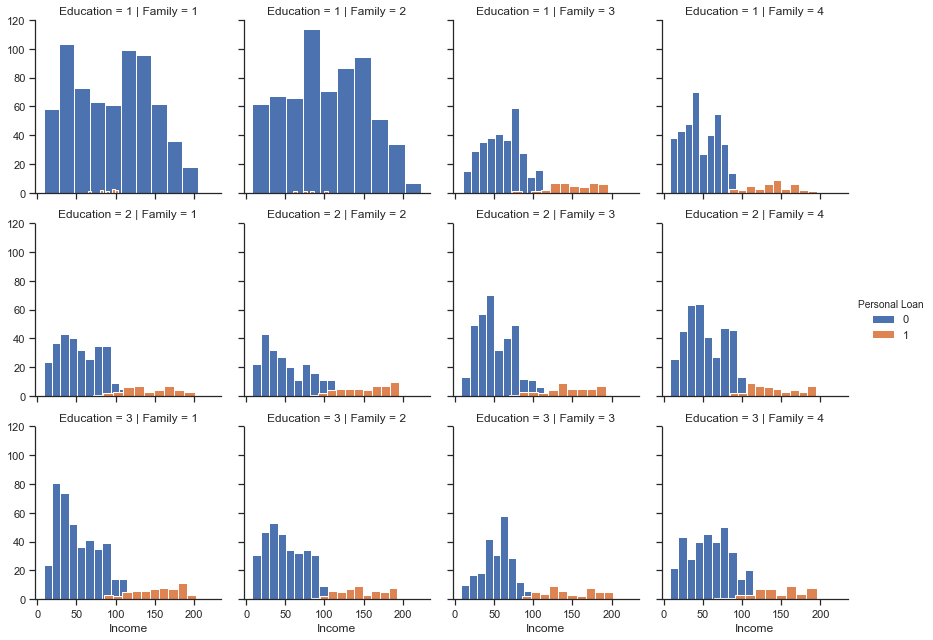

In [65]:
sns.FacetGrid(data=df,row='Education',col='Family',hue='Personal Loan').map(plt.hist,'Income').add_legend()

Observation:

Irrespective of their income, undergraduate customers with 1 or 2 family members generally do not opt for personal loans.

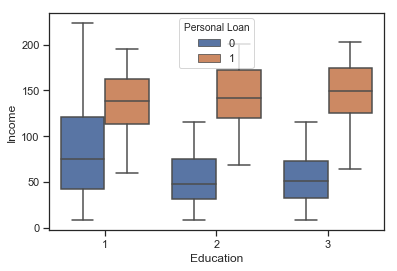

In [66]:
sns.boxplot(x='Education',y='Income',hue='Personal Loan',data=df);

Observations:



*  In each education category,customers with higher the income tend to buy personal Loans.
*   The box plots show that those with education level 1 have higher incomes. 

*  Customers who go for personal loans have the same income distribution regardless of the education level.







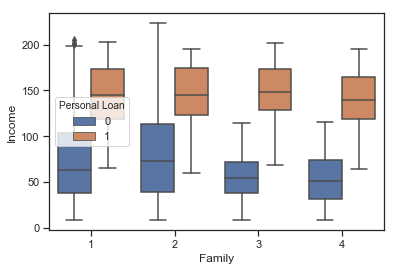

In [67]:
sns.boxplot(x='Family',y='Income',hue='Personal Loan',data=df)

Observation:

For customers with 1,2,3 or 4 family members, higher income is an important factor to buy personal Loans.

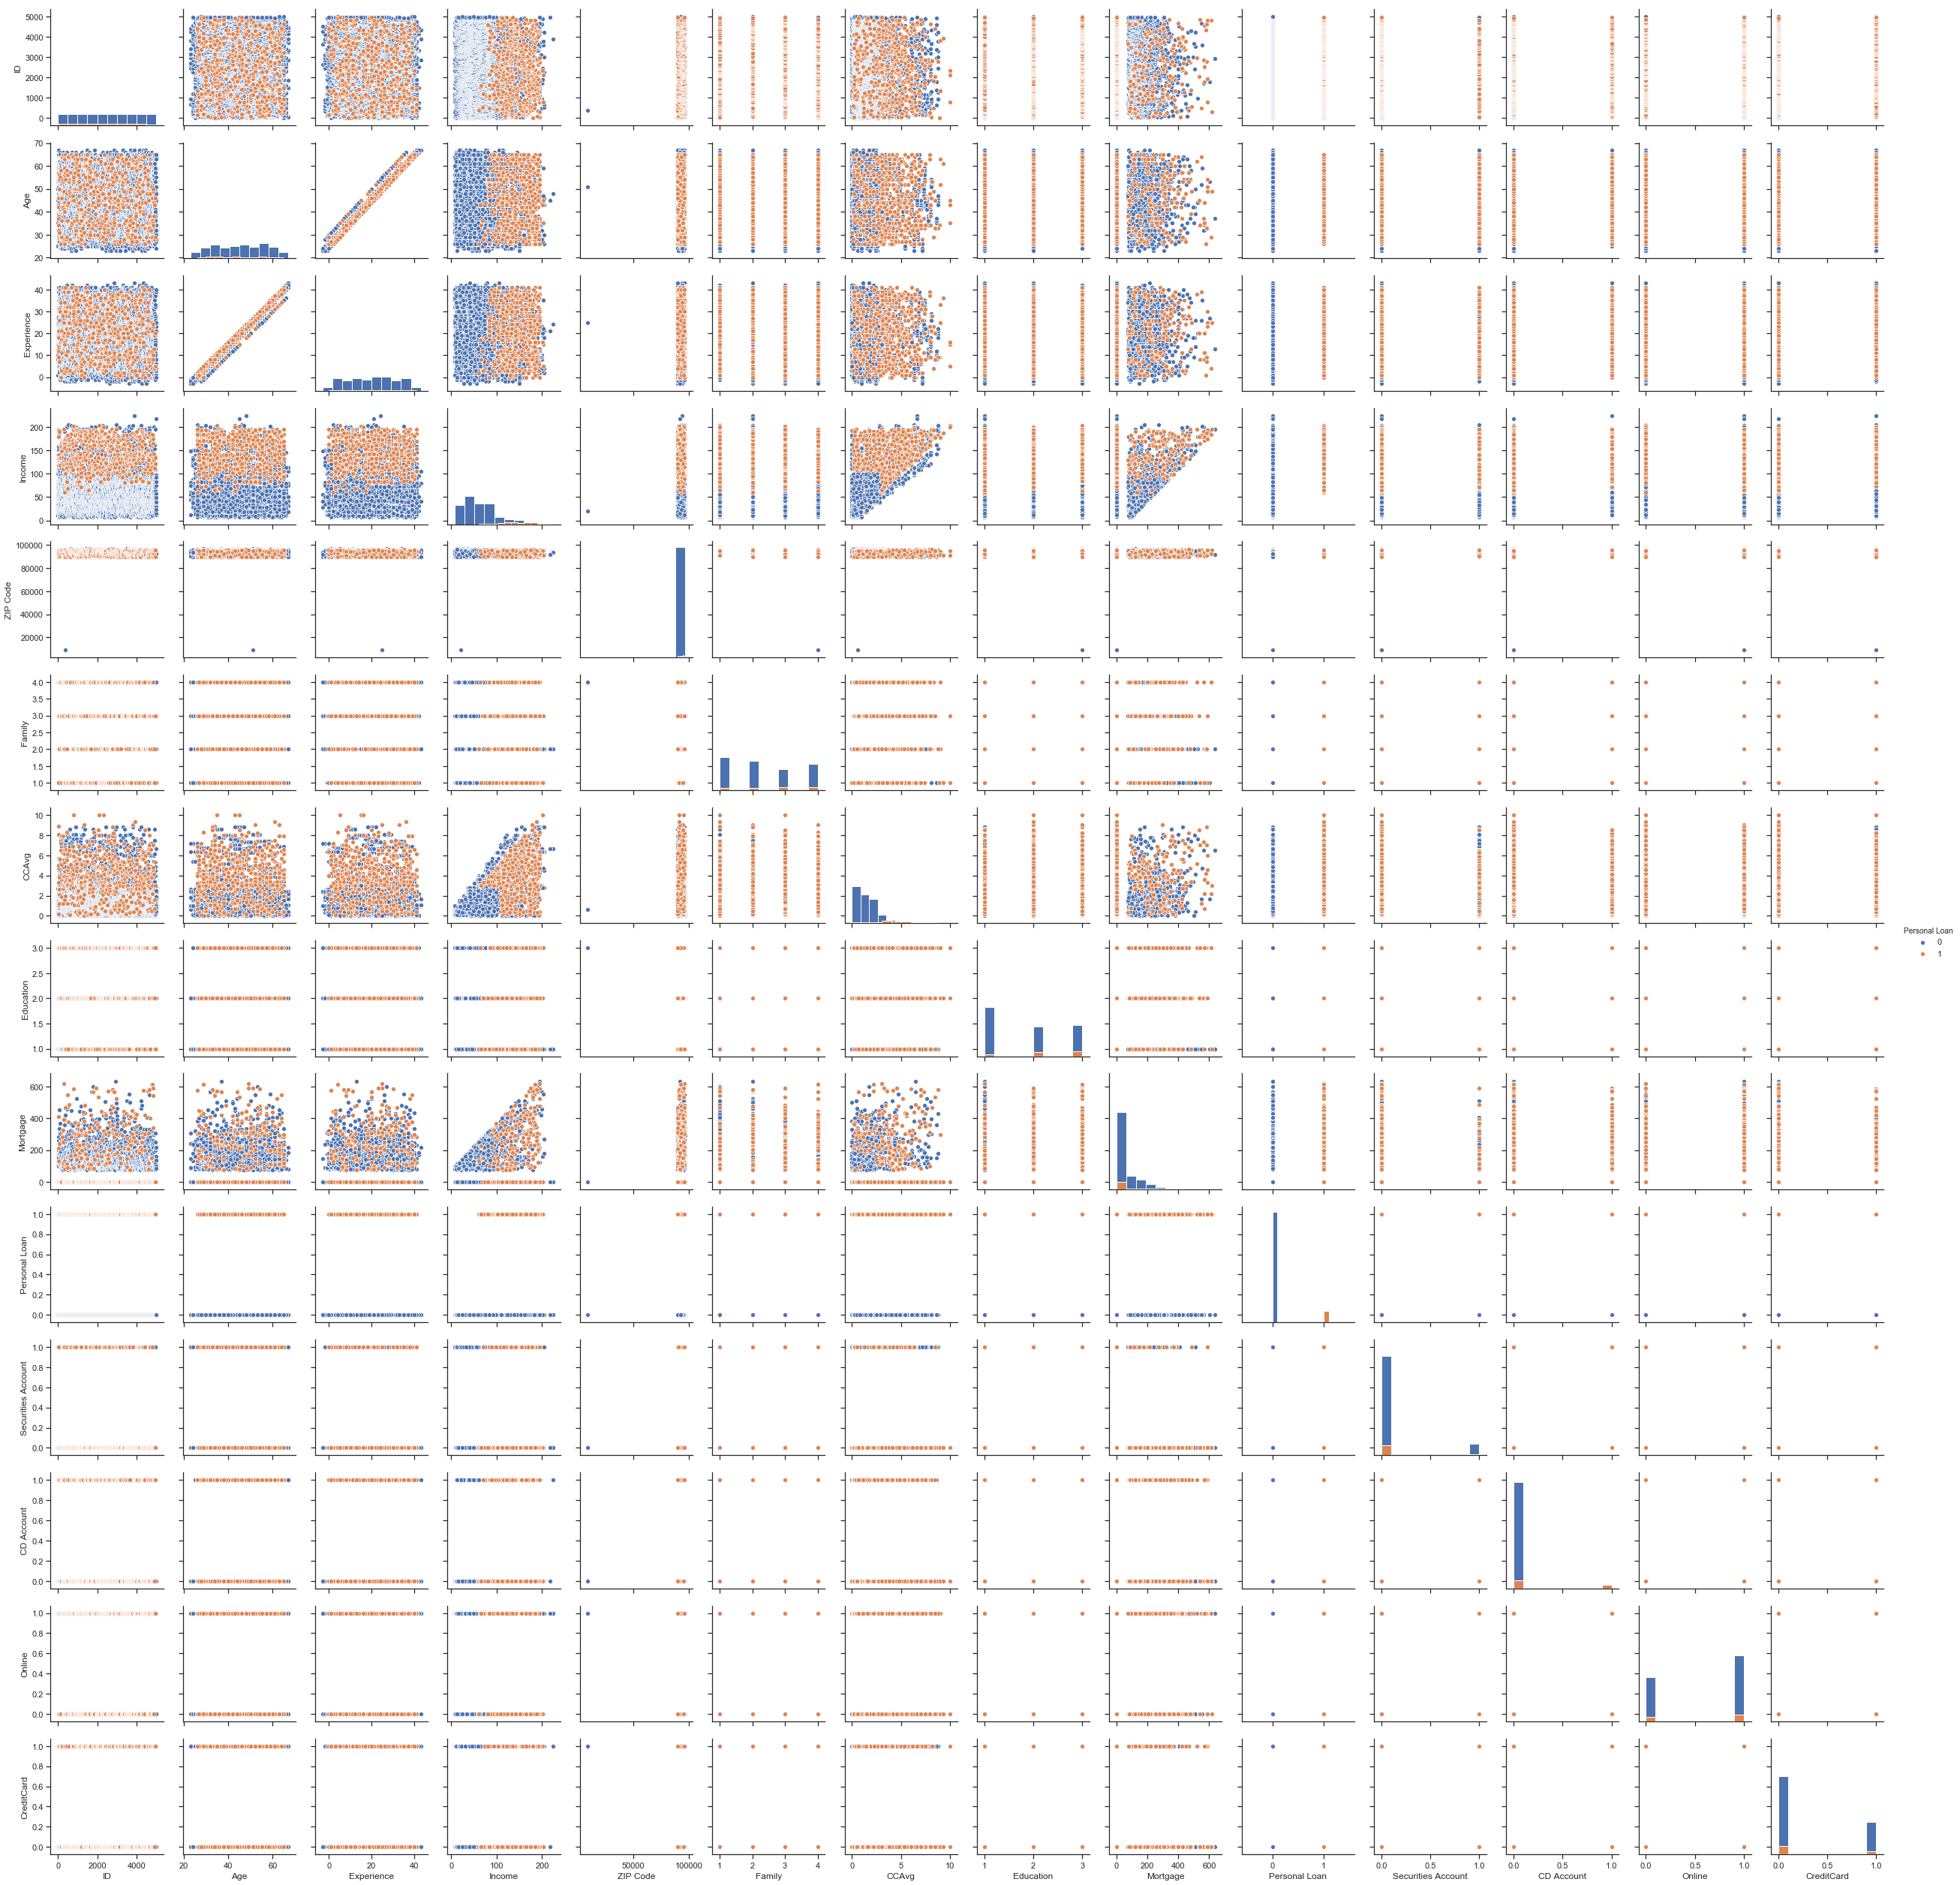

In [68]:
# Before moving further, let us plot the pairplot using all attributes
sns.pairplot(df_orig,hue='Personal Loan',diag_kind='hist');

Observations


* Age has a positive linear relationship with Experience


* Income, CCAvg, Mortgage histograms are not normally distributedList item



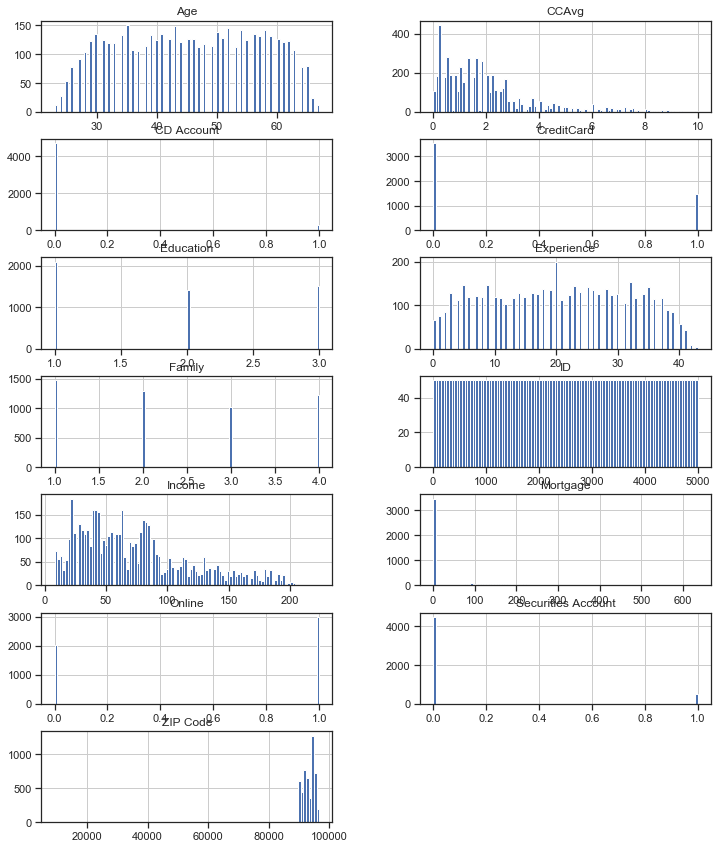

In [69]:
columns = list(df)[0:-1] 
df[columns].hist(stacked=False, bins=100, figsize=(12,30), layout=(14,2)); 


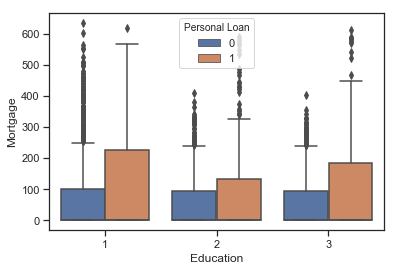

In [70]:
sns.boxplot(x="Education", y='Mortgage', hue="Personal Loan", data=df)

Observation:

Customers who taken loan also have higher mortgages.

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,0


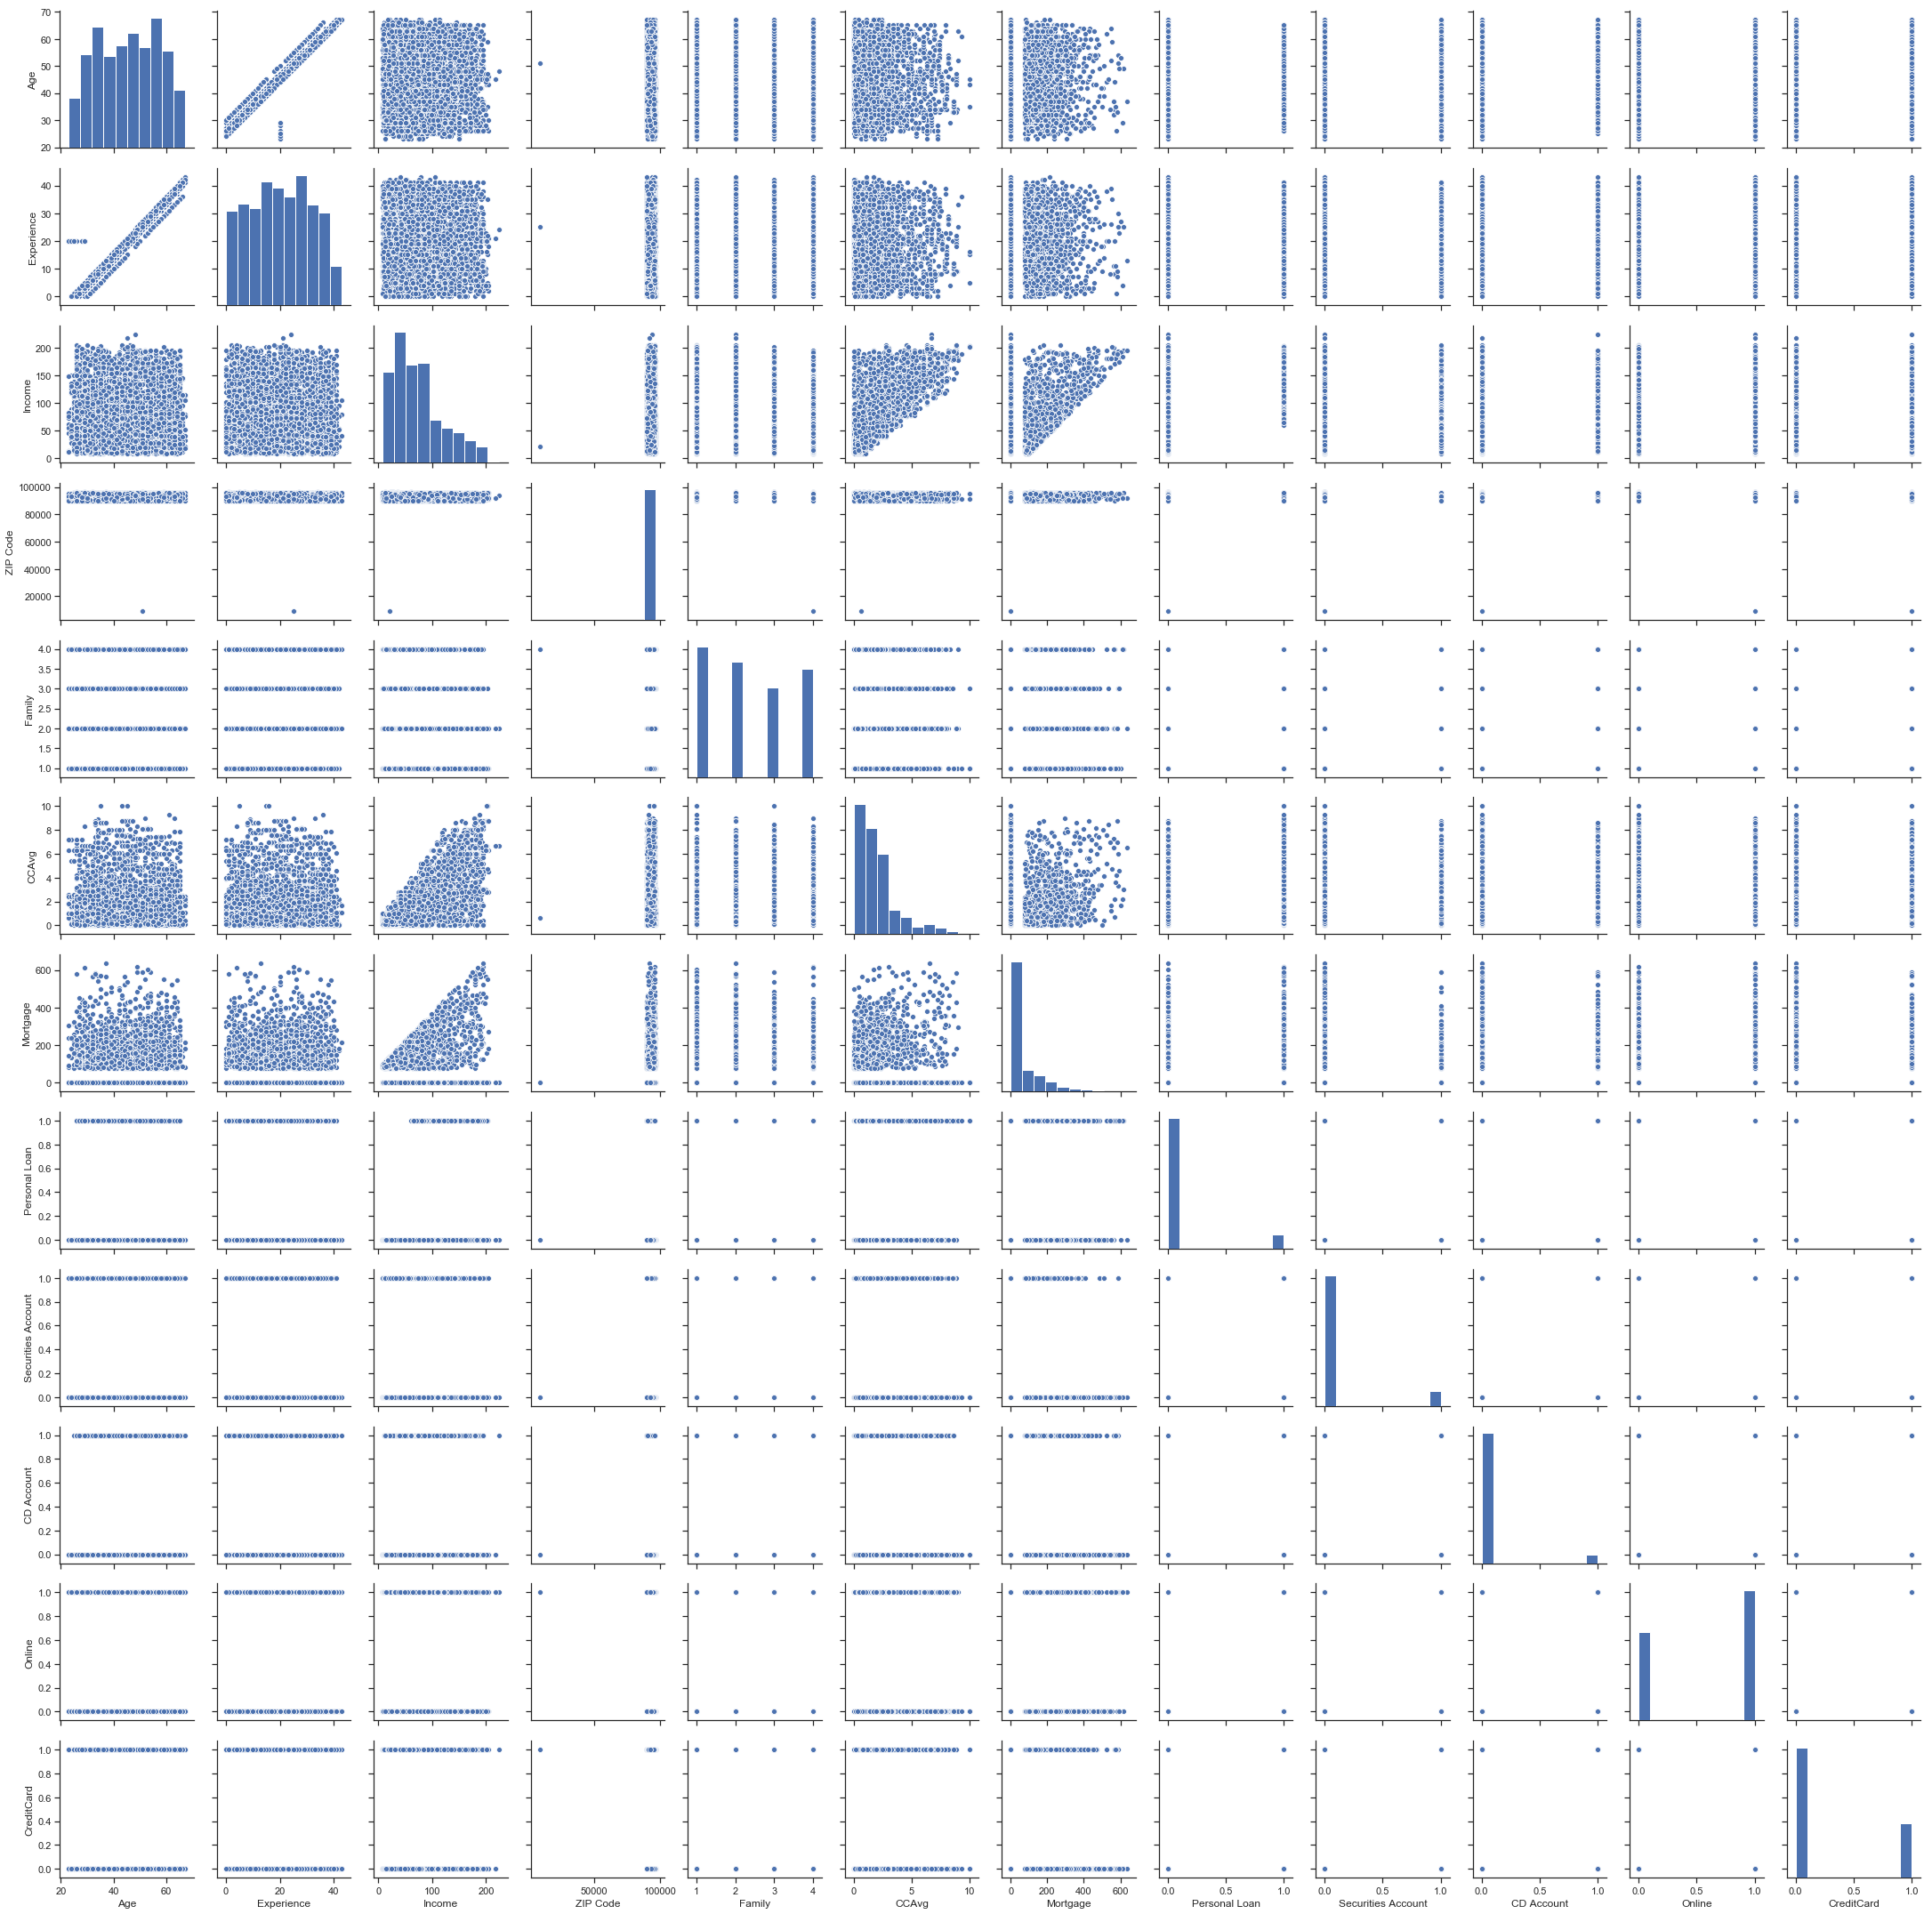

In [71]:
plt = sns.pairplot(df[['Age','Experience','Income','ZIP Code','Family','CCAvg' , 'Mortgage','Personal Loan','Securities Account','CD Account','Online','CreditCard']])
df.head(1)

Observations:


*   Age and Experience are extremely corelated as seen from above graphs and maps.
*   Income and CCAvg are also corelated as seen from above graphs and maps.





## Creating Dummy Variables

In [72]:
#Creating family dummy Variables
fa = pd.get_dummies(df['Family'], prefix='Family')
#Adding the results to the master dataframe
bank_df1 = pd.concat([df,fa], axis=1)
#Creating education dummy Variables
ed = pd.get_dummies(df['Education'], prefix='Education')
#Adding the results to the master dataframe
bank_df1 = pd.concat([bank_df1,ed], axis=1)

In [73]:
# We have created dummies for the below variables, so we can drop them
##bank_df2 is our new dataset after cleaning and transformation
bank_df2=bank_df1.drop(['Education','Family'],1)

var=['Securities Account','CD Account','Online','CreditCard']

bank_df2[var]=bank_df2[var].astype('int64')
bank_df2_X = bank_df2.drop(['Personal Loan'], axis=1)

x = bank_df2.drop(['Personal Loan'], axis=1)
y = bank_df2['Personal Loan']

In [74]:
x.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
CCAvg                 float64
Mortgage                int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
Family_1                uint8
Family_2                uint8
Family_3                uint8
Family_4                uint8
Education_1             uint8
Education_2             uint8
Education_3             uint8
dtype: object

## Splitting the data into training and test set in the ratio of 70:30 respectively

In [75]:
 
#Test Train Split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bank_df2_X, y, train_size=0.7, test_size=0.3, random_state=1)

## Feature Scaling

In [76]:
#Feature Scaling library
from sklearn.preprocessing import StandardScaler
#Applying Scaling to training set
scaler = StandardScaler()
x_train[['Age','Experience','Income','CCAvg']] = scaler.fit_transform(x_train[['Age','Experience','Income','CCAvg']])
x_test[['Age','Experience','Income','CCAvg']] = scaler.transform(x_test[['Age','Experience','Income','CCAvg']])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs

In [77]:
#let's check the split of data
print("{0:0.2f}% data is in training set".format((len(x_train)/len(df.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(df.index)) * 100))

70.00% data is in training set
30.00% data is in test set


In [78]:
x_train.describe()

,ID,Age,Experience,Income,ZIP Code,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Family_1,Family_2,Family_3,Family_4,Education_1,Education_2,Education_3
count,3500.000000,3.500000e+03,3.500000e+03,3.500000e+03,3500.000000,3.500000e+03,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000
mean,2509.494857,-2.263269e-16,-7.828658e-17,2.679404e-17,93154.421429,-1.087662e-16,56.054857,0.104571,0.062571,0.591143,0.297429,0.293714,0.260286,0.203143,0.242857,0.415714,0.282286,0.302000
std,1441.741640,1.000143e+00,1.000143e+00,1.000143e+00,2259.694861,1.000143e+00,100.523942,0.306044,0.242225,0.491693,0.457192,0.455528,0.438853,0.402395,0.428871,0.492915,0.450176,0.459191
min,1.000000,-1.949859e+00,-1.816009e+00,-1.421959e+00,9307.000000,-1.115208e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1261.750000,-9.069414e-01,-8.396190e-01,-7.504064e-01,91910.000000,-7.116236e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2509.500000,-3.784303e-02,-4.075476e-02,-2.304943e-01,93555.000000,-2.503843e-01,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3753.500000,8.312553e-01,8.468722e-01,5.277107e-01,94608.000000,3.261648e-01,100.250000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,5000.000000,1.874173e+00,2.000787e+00,3.257249e+00,96651.000000,4.650283e+00,617.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [79]:
x_test.describe()

,ID,Age,Experience,Income,ZIP Code,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Family_1,Family_2,Family_3,Family_4,Education_1,Education_2,Education_3
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,2479.512000,-0.028109,-0.038920,0.009691,93148.026667,0.006981,57.534667,0.104000,0.055333,0.610000,0.28600,0.296000,0.256667,0.199333,0.248000,0.427333,0.276667,0.296000
std,1447.925203,0.987198,0.995626,0.990695,1759.387617,1.025160,104.464156,0.305362,0.228706,0.487913,0.45204,0.456643,0.436940,0.399632,0.431996,0.494856,0.447499,0.456643
min,2.000000,-1.949859,-1.816009,-1.421959,90009.000000,-1.115208,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1230.250000,-0.906941,-0.928382,-0.750406,92007.000000,-0.730842,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2473.500000,-0.037843,-0.040755,-0.208831,93305.000000,-0.250384,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3740.500000,0.831255,0.758110,0.592700,94608.000000,0.383820,102.000000,0.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,4998.000000,1.874173,2.000787,2.780663,96651.000000,4.650283,635.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Observation:

As we checked missing values earlier but haven't got any. 
But there can be lots of entries with 0 values. We must need to take care of those as well.

In [80]:
x_train.head()

,ID,Age,Experience,Income,ZIP Code,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Family_1,Family_2,Family_3,Family_4,Education_1,Education_2,Education_3
1334,1335,0.135977,0.136771,-0.837058,94304,-0.365694,0,0,0,1,0,0,1,0,0,1,0,0
4768,4769,-0.646212,-0.573331,-0.750406,93118,0.037890,0,0,0,1,0,1,0,0,0,0,1,0
65,66,1.178895,1.290686,1.242590,91360,1.075679,0,0,0,1,1,1,0,0,0,1,0,0
177,178,-1.428400,-1.549721,-0.187168,94132,-0.077420,244,0,0,0,0,0,0,0,1,0,1,0
4489,4490,-0.559302,-0.662094,-1.140340,95518,-0.999898,0,0,0,1,0,0,0,1,0,0,1,0


In [81]:
 #If We can see lots of 0 entries above.
# Replace 0s with serial mean
#from sklearn.preprocessing import Imputer
#my_imputer = Imputer()
#data_with_imputed_values = my_imputer.fit_transform(original_data)

from sklearn.impute import SimpleImputer
rep_0 = SimpleImputer(missing_values=0, strategy="mean")
cols=x_train.columns
x_train = pd.DataFrame(rep_0.fit_transform(x_train))
x_test = pd.DataFrame(rep_0.fit_transform(x_test))

x_train.columns = cols
x_test.columns = cols
x_train.head()

,ID,Age,Experience,Income,ZIP Code,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Family_1,Family_2,Family_3,Family_4,Education_1,Education_2,Education_3
0,1335.0,0.135977,0.136771,-0.837058,94304.0,-0.365694,181.659259,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,4769.0,-0.646212,-0.573331,-0.750406,93118.0,0.037890,181.659259,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,66.0,1.178895,1.290686,1.242590,91360.0,1.075679,181.659259,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,178.0,-1.428400,-1.549721,-0.187168,94132.0,-0.077420,244.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,4490.0,-0.559302,-0.662094,-1.140340,95518.0,-0.999898,181.659259,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [82]:
# ## removing negative values
x_train.mask(x_train < 0, x_train.mean(), inplace=True, axis=1)
x_test.mask(x_test < 0, x_test.mean(), inplace=True, axis=1)
x_test.head()

,ID,Age,Experience,Income,ZIP Code,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Family_1,Family_2,Family_3,Family_4,Education_1,Education_2,Education_3
0,2765.0,-0.028109,-0.038920,0.224429,91320.0,0.556784,105.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,4768.0,-0.028109,-0.038920,0.009691,90639.0,0.006981,101.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,3815.0,-0.028109,-0.038920,0.009691,94304.0,0.006981,188.432314,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,3500.0,0.309796,0.225533,0.874319,94550.0,0.006981,286.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,2736.0,-0.028109,-0.038920,0.009691,92131.0,0.383820,165.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


## **Logistic Regression**

In [83]:
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [84]:
#Fitting the model on test data
x_test1 = x_test.drop(['Family_2','Education_1','Age','Mortgage','ZIP Code','CCAvg','Education_2',
                        'Education_3','Experience'],
                        axis=1)
x_test.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'CCAvg', 'Mortgage',
       'Securities Account', 'CD Account', 'Online', 'CreditCard', 'Family_1',
       'Family_2', 'Family_3', 'Family_4', 'Education_1', 'Education_2',
       'Education_3'],
      dtype='object')

In [85]:
y_pred = logreg.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.90


In [86]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1344    7]
 [ 144    5]]


Observations:

*  True positives (TP): These are cases in which we predicted yes, and actually took loan->
TP=1344
*  True negatives (TN): We predicted no, and they actually did not took loan->
TN=5
*  False positives (FP): We predicted yes, but they don't actually took loan.(Also known as a "Type I error.")->
FP=7
* False negatives (FN): We predicted no, but they actually took loan.(Also known as a "Type II error.")->
FN=144

In [87]:
#true positives (TP): These are cases in which we predicted yes, and actually took loan.
TP=1344
#true negatives (TN): We predicted no, and they actually did not took loan.
TN=5
#false positives (FP): We predicted yes, but they don't actually took loan.(Also known as a "Type I error.")
FP=7
#false negatives (FN): We predicted no, but they actually took loan.(Also known as a "Type II error.")
FN=144

Accuracy  test set: 89.93%
Misclassification Rate: It is often wrong: 10.07%
Sensitivity: When its actually yes how often it predicts yes: 90.32%
Specificity: When its actually no, how often does it predict no: 41.67%
Precision: When it predicts yes, how often is it correct: 99.48%


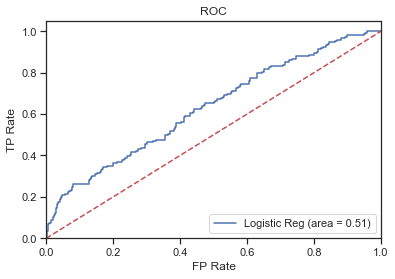

In [88]:
Accuracy=(TP+TN)/(TP+TN+FP+FN)
print('Accuracy  test set: {:.2%}'.format(Accuracy))

Misclassification_Rate=(FP+FN)/(TP+TN+FP+FN)
print('Misclassification Rate: It is often wrong: {:.2%}'.format(Misclassification_Rate))

#Recall
Sensitivity=TP/(FN+TP)
print('Sensitivity: When its actually yes how often it predicts yes: {:.2%}'.format(Sensitivity))

Specificity=TN/(TN+FP)
print('Specificity: When its actually no, how often does it predict no: {:.2%}'.format(Specificity))

Precision=TP/(FP+TP)
print('Precision: When it predicts yes, how often is it correct: {:.2%}'.format(Precision))

#ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
pl.clf()
pl.plot(fpr, tpr, label='Logistic Reg (area = %0.2f)' % logit_roc_auc)
pl.plot([0, 1], [0, 1],'r--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.05])
pl.xlabel('FP Rate')
pl.ylabel('TP Rate')
pl.title('ROC')
pl.legend(loc="lower right")
pl.savefig('Log_ROC')
pl.show()

## **Naive Bayes Model**

In [89]:
#### Naive Bayes Model
from sklearn.naive_bayes import GaussianNB # using Gaussian algorithm from Naive Bayes

# creatw the model
GNB1 = GaussianNB()
GNB1.fit(x_train, y_train)
predicted_labels_GNB = GNB1.predict(x_test)

GNB1.score(x_test, y_test)
print(metrics.confusion_matrix(y_test, predicted_labels_GNB))

[[1242  109]
 [  70   79]]


Observations:


*  True positives (TP): These are cases in which we predicted yes, and actually took loan->
TP=1245
*  True negatives (TN): We predicted no, and they actually did not took loan->
TN=78
*  False positives (FP): We predicted yes, but they don't actually took loan.(Also known as a "Type I error.")->
FP=106
*  False negatives (FN): We predicted no, but they actually took loan.(Also known as a "Type II error.")->
FN=71




In [90]:
#CALCULATING METRICES FOR CHECING MODEL
#true positives (TP): These are cases in which we predicted yes, and actually took loan.
TP=1245
#true negatives (TN): We predicted no, and they actually did not took loan.
TN=78
#false positives (FP): We predicted yes, but they don't actually took loan.(Also known as a "Type I error.")
FP=106
#false negatives (FN): We predicted no, but they actually took loan.(Also known as a "Type II error.")
FN=71

Accuracy  on test set: 88.20%
Misclassification Rate: It is often wrong: 11.80%
Sensitivity: When its actually yes how often it predicts yes: 94.60%
Specificity: When its actually no, how often does it predict no: 42.39%
Precision: When it predicts yes, how often is it correct: 92.15%


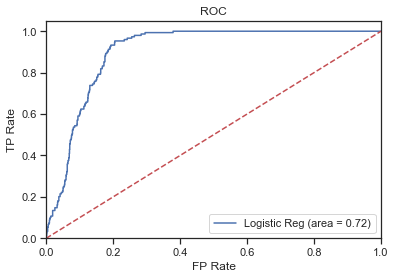

In [91]:
Accuracy=(TP+TN)/(TP+TN+FP+FN)
print('Accuracy  on test set: {:.2%}'.format(Accuracy))

Misclassification_Rate=(FP+FN)/(TP+TN+FP+FN)
print('Misclassification Rate: It is often wrong: {:.2%}'.format(Misclassification_Rate))

#Recall
Sensitivity=TP/(FN+TP)
print('Sensitivity: When its actually yes how often it predicts yes: {:.2%}'.format(Sensitivity))

Specificity=TN/(TN+FP)
print('Specificity: When its actually no, how often does it predict no: {:.2%}'.format(Specificity))

Precision=TP/(FP+TP)
print('Precision: When it predicts yes, how often is it correct: {:.2%}'.format(Precision))

#ROC Curve
GNB_roc_auc = roc_auc_score(y_test, GNB1.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, GNB1.predict_proba(x_test)[:,1])
pl.clf()
pl.plot(fpr, tpr, label='Logistic Reg (area = %0.2f)' % GNB_roc_auc)
pl.plot([0, 1], [0, 1],'r--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.05])
pl.xlabel('FP Rate')
pl.ylabel('TP Rate')
pl.title('ROC')
pl.legend(loc="lower right")
pl.savefig('Log_ROC')
pl.show()

## **KNN Model**

In [92]:

from sklearn.neighbors import KNeighborsClassifier
NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'uniform' )
# Call Nearest Neighbour algorithm

NNH.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [93]:
## # Evaluate Performance of kNN Model
predicted = NNH.predict(x_test)
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, predicted)
acc

0.8973333333333333

In [94]:
predicted_labels = NNH.predict(x_test)
NNH.score(x_test, y_test)

0.8973333333333333

In [95]:
# # calculate accuracy measures and confusion matrix

print(metrics.confusion_matrix(y_test, predicted_labels))

[[1346    5]
 [ 149    0]]


Observations:

*   True positives (TP): These are cases in which we predicted yes, and actually took loan->
TP=1346
*   True negatives (TN): We predicted no, and they actually did not took loan->
TN=0
*   False positives (FP): We predicted yes, but they don't actually took loan.(Also known as a "Type I error.")->
FP=5
*   False negatives (FN): We predicted no, but they actually took loan.(Also known as a "Type II error.")->
FN=149





Accuracy on test set: 89.73%
Misclassification Rate: It is often wrong: 10.27%
Sensitivity: When its actually yes how often it predicts yes: 90.03%
Specificity: When its actually no, how often does it predict no: 0.00%
Precision: When it predicts yes, how often is it correct: 99.63%


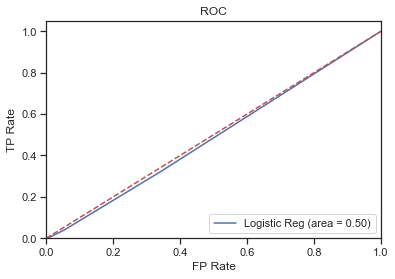

In [96]:
#CALCULATING METRICES FOR CHECING MODEL
#true positives (TP): These are cases in which we predicted yes, and actually took loan.
TP=1346
#true negatives (TN): We predicted no, and they actually did not took loan.
TN=0
#false positives (FP): We predicted yes, but they don't actually took loan.(Also known as a "Type I error.")
FP=5
#false negatives (FN): We predicted no, but they actually took loan.(Also known as a "Type II error.")
FN=149

Accuracy=(TP+TN)/(TP+TN+FP+FN)
print('Accuracy on test set: {:.2%}'.format(Accuracy))

Misclassification_Rate=(FP+FN)/(TP+TN+FP+FN)
print('Misclassification Rate: It is often wrong: {:.2%}'.format(Misclassification_Rate))

#Recall
Sensitivity=TP/(FN+TP)
print('Sensitivity: When its actually yes how often it predicts yes: {:.2%}'.format(Sensitivity))

Specificity=TN/(TN+FP)
print('Specificity: When its actually no, how often does it predict no: {:.2%}'.format(Specificity))

Precision=TP/(FP+TP)
print('Precision: When it predicts yes, how often is it correct: {:.2%}'.format(Precision))

#ROC Curve
KNN_roc_auc = roc_auc_score(y_test, NNH.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, NNH.predict_proba(x_test)[:,1])
pl.clf()
pl.plot(fpr, tpr, label='Logistic Reg (area = %0.2f)' % KNN_roc_auc)
pl.plot([0, 1], [0, 1],'r--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.05])
pl.xlabel('FP Rate')
pl.ylabel('TP Rate')
pl.title('ROC')
pl.legend(loc="lower right")
pl.savefig('Log_ROC')
pl.show()

# **Calling Nearest Neighbour algorithm, keeping number of neighbours as 7**

In [97]:

NNH2 = KNeighborsClassifier(n_neighbors= 7, weights = 'uniform' )
NNH2.fit(x_train, y_train)

predicted_labels_KNN = NNH2.predict(x_test)

NNH2.score(x_test, y_test)

print(metrics.confusion_matrix(y_test, predicted_labels_KNN))

[[1351    0]
 [ 149    0]]


Observations:

*   True positives (TP): These are cases in which we predicted yes, and actually took loan->
TP=1346
*   True negatives (TN): We predicted no, and they actually did not took loan->
TN=0
*   False positives (FP): We predicted yes, but they don't actually took loan.(Also known as a "Type I error.")->
FP=5
*   False negatives (FN): We predicted no, but they actually took loan.(Also known as a "Type II error.")->
FN=149

Accuracy of logistic regression classifier on test set: 89.73%
Misclassification Rate: It is often wrong: 10.27%
Sensitivity: When its actually yes how often it predicts yes: 90.03%
Specificity: When its actually no, how often does it predict no: 0.00%
Precision: When it predicts yes, how often is it correct: 99.63%


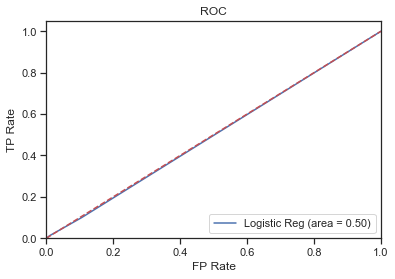

In [98]:
#CALCULATING METRICES FOR CHECING MODEL
#true positives (TP): These are cases in which we predicted yes, and actually took loan.
TP=1346
#true negatives (TN): We predicted no, and they actually did not took loan.
TN=0
#false positives (FP): We predicted yes, but they don't actually took loan.(Also known as a "Type I error.")
FP=5
#false negatives (FN): We predicted no, but they actually took loan.(Also known as a "Type II error.")
FN=149

Accuracy=(TP+TN)/(TP+TN+FP+FN)
print('Accuracy of logistic regression classifier on test set: {:.2%}'.format(Accuracy))

Misclassification_Rate=(FP+FN)/(TP+TN+FP+FN)
print('Misclassification Rate: It is often wrong: {:.2%}'.format(Misclassification_Rate))

#Recall
Sensitivity=TP/(FN+TP)
print('Sensitivity: When its actually yes how often it predicts yes: {:.2%}'.format(Sensitivity))

Specificity=TN/(TN+FP)
print('Specificity: When its actually no, how often does it predict no: {:.2%}'.format(Specificity))

Precision=TP/(FP+TP)
print('Precision: When it predicts yes, how often is it correct: {:.2%}'.format(Precision))

#ROC Curve
KNN_roc_auc = roc_auc_score(y_test, NNH2.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, NNH2.predict_proba(x_test)[:,1])
pl.plot(fpr, tpr, label='Logistic Reg (area = %0.2f)' % KNN_roc_auc)
pl.plot([0, 1], [0, 1],'r--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.05])
pl.xlabel('FP Rate')
pl.ylabel('TP Rate')
pl.title('ROC')
pl.legend(loc="lower right")
pl.savefig('Log_ROC')
pl.show()

In [99]:
scores =[]
for k in range(1,50):
    NNH = KNeighborsClassifier(n_neighbors = k, weights = 'distance' )
    NNH.fit(x_train, y_train)
    scores.append(NNH.score(x_test, y_test))

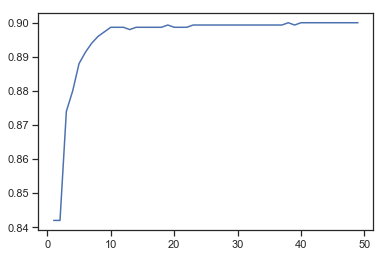

In [100]:
pl.plot(range(1,50),scores)

# **Business Understanding**


#**Logistic Regression** 
*   Accuracy of logistic regression classifier on test set: 89.93%
*   Misclassification Rate: It is often wrong: 10.07%
*   Sensitivity: When its actually yes how often it predicts yes: 90.32%
*   Specificity: When its actually no, how often does it predict no: 41.67%
*   Precision: When it predicts yes, how often is it correct: 99.48%
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------

#**Naive Bayes**


*   Accuracy of logistic regression classifier on test set: 88.20%
*   Misclassification Rate: It is often wrong: 11.80%
*   Sensitivity: When its actually yes how often it predicts yes: 94.60%
*   Specificity: When its actually no, how often does it predict no: 42.39%
*   Precision: When it predicts yes, how often is it correct: 92.15%
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------

#**KNN**

*   Accuracy of logistic regression classifier on test set: 89.73%
*   Misclassification Rate: It is often wrong: 10.27%
*   Sensitivity: When its actually yes how often it predicts yes: 90.03%
*   Specificity: When its actually no, how often does it predict no: 0.00%
*   Precision: When it predicts yes, how often is it correct: 99.63%
----------------------------------------------------------------------------------------------------------------------------------------------------------------



## **Conclusion**

 We can conclude that in case we apply the model and change our approach and target only those which have been predicted as yes first,it is 92.15% (Precision) that they will take loan.Hence, chances that a person takes personal loan increases,but Sensitivity is around 94.60% we end up offering more loans at the  end.We also found that ID and Zip Code were not contributing factors.Also,Age and Experience were highly correlated.